# Logistic Regression

use rlambda>0 for regularization

use map_feature for adding polinomial terms (only for 2 variables)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
def sigmoid(x):
    res = 1. / (1. + np.exp(-x))
    return res


def compute_cost(X, y, theta, rlambda):
    
    m = X.shape[0]
    res = 0.5 * rlambda / m * (theta[1:].T).dot(theta[1:])[0][0]
    h = sigmoid(X.dot(theta))
    res -= 1. / m * ((y.T).dot(np.log(h)) + ((1 - y).T).dot(np.log(1 - h)))
    res = res[0][0]
    
    return res
        
    
def gradient_descent(X, y, theta, alpha, rlambda, num_iters):
    
    costs = []
    m = X.shape[0]
    n = X.shape[1]
    for it in range(num_iters):
        h = sigmoid(X.dot(theta))
        temp = theta[0]
        theta = theta - alpha / m * ((X.T).dot(h - y) + rlambda * theta)
        theta[0] += alpha / m * rlambda * temp
        costs.append(compute_cost(X, y, theta, rlambda))

    return theta, costs


def feature_normalize(X):
    
    mean_values = []
    std_values = []
    X_norm = np.zeros(X.shape)
    for i in range(X.shape[1]):
        m = np.mean(X[:, i])
        s = np.std(X[:, i])
        mean_values.append(m)
        std_values.append(s)
        X_norm[:, i] = X[:, i] - m
        if s != 0:
            X_norm[:, i] /= s

    return X_norm, mean_values, std_values


def logistic_regression(X, y, alpha=0.01, rlambda=0., num_iters=100):
    
    n = X.shape[1] + 1
    theta = np.zeros((n, 1))
    X_norm, mean_values, std_values = feature_normalize(X)
    X_norm = np.hstack([np.ones((X.shape[0], 1)), X_norm])
    theta, costs = gradient_descent(X_norm, y, theta, alpha, rlambda, num_iters)
    
    return theta, mean_values, std_values, costs


def get_result(X, theta, eps, mean_values, std_values):
    
    X_norm = np.zeros(X.shape)
    for i in range(X.shape[1]):
        X_norm[:, i] = X[:, i] - mean_values[i]
        if std_values[i] != 0:
            X_norm[:, i] /= std_values[i]
    X_norm = np.hstack([np.ones((X.shape[0], 1)), X_norm])
    h = sigmoid(X_norm.dot(theta))
    res = [1. if el[0] > eps else 0. for el in h]
    res = np.ndarray(buffer=np.array([1. if el[0] > eps else 0. for el in h]), shape=(X.shape[0],1))
    
    return res, h


def map_feature(x1, x2):
    '''
    Maps the two input features to quadratic features.
    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    Inputs X1, X2 must be the same size
    '''
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    res = np.ones(shape=(x1[:, 0].size, 1))

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            res = np.append(res, r, axis=1)
    res = res[:,1:]

    return res


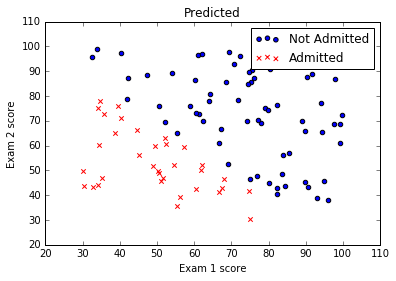

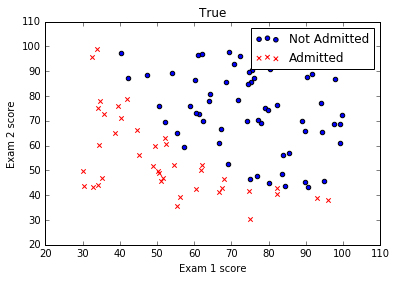

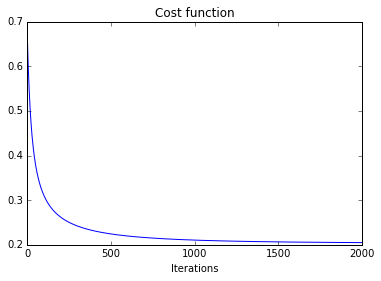

theta [ 1.50553399  3.54060004  3.28777073]
cost 0.204915144443


In [3]:
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
y = y.reshape((len(y),1))

alpha = 0.1
num_iters = 2000
rlambda = 0.
eps = 0.3

theta, mean_values, std_values, costs = logistic_regression(X, y, alpha, rlambda, num_iters)
pred, h = get_result(X, theta, eps, mean_values, std_values)

pos_pred = np.where(pred == 1)[0]
neg_pred = np.where(pred == 0)[0]
plt.scatter(X[pos_pred, 0], X[pos_pred, 1], marker='o', c='b')
plt.scatter(X[neg_pred, 0], X[neg_pred, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Not Admitted', 'Admitted'])
plt.title('Predicted')
plt.show()

pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Not Admitted', 'Admitted'])
plt.title('True')
plt.show()

plt.plot(range(num_iters), costs)
plt.title('Cost function')
plt.xlabel('Iterations')
plt.show()

'''
for eps in [0.1*i for i in range(1,10)]:
    pred,h = get_result(X, theta, eps, mean_values, std_values)
    print eps, ' ', y[np.where(pred == y)].size / float(y.size)

'''
print 'theta', theta.flatten()
print 'cost', costs[-1]

### Using polinomial terms

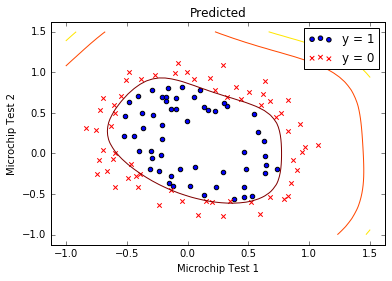

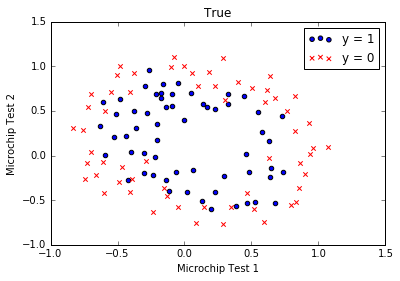

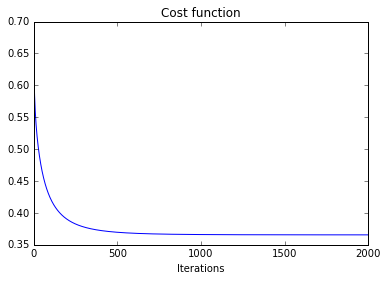

theta [-0.52021082  0.70815328  1.30531413 -0.68517861 -0.89632937 -0.94508664
  0.33181421  0.34590918  0.12971544  0.23287452 -0.86428412 -0.13419632
 -0.25251831 -0.3746461  -0.88676996 -0.14289168 -0.04544131  0.64764009
 -0.27541035 -0.47765878 -0.10158537 -0.85999697 -0.02242767 -0.27729427
  0.33504765 -0.66117189 -0.39654307 -0.57381894]
cost 0.365586821919


In [4]:
data = np.loadtxt('ex2data2.txt', delimiter=',')

X = data[:, 0:2]
y = data[:, 2]
y = y.reshape((len(y),1))
X_new = map_feature(X[:, 0], X[:, 1])

alpha = 0.1
num_iters = 2000
rlambda = 1.
eps = 0.6

theta, mean_values, std_values, costs = logistic_regression(X_new, y, alpha, rlambda, num_iters)
pred, h = get_result(X_new, theta, eps, mean_values, std_values)

pos_pred = np.where(pred == 1)[0]
neg_pred = np.where(pred == 0)[0]
plt.scatter(X[pos_pred, 0], X[pos_pred, 1], marker='o', c='b')
plt.scatter(X[neg_pred, 0], X[neg_pred, 1], marker='x', c='r')
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = np.append(np.ones((1,1)),(map_feature(np.array(u[i]), np.array(v[j])) - mean_values)/std_values, 
                            axis=1).dot(np.array(theta))
z = z.T
plt.contour(u, v, z)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0', 'Decision boundary'])
plt.title('Predicted')
plt.show()

pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0', 'Decision boundary'])
plt.title('True')
plt.show()

plt.plot(range(num_iters), costs)
plt.title('Cost function')
plt.xlabel('Iterations')
plt.show()

print 'theta', theta.flatten()
print 'cost', costs[-1]